In [1]:
import sys
import os
import warnings

os.chdir("../ProjVizGit")
warnings.filterwarnings('ignore')

# VOLUME RENDERING 
 
Léo Kulinski, Emma Caizergues

<center>
    <img src="Images\volume rendering 2.png" width="450"/>
</center>


## Volume Ray Casting Technique :

<center>
    <img src="Images\volume_ray_casting.png" width="1300"/>
</center>

### Goal : implement the ray casting technique from scratch
 $\rightarrow$ In python

 $\rightarrow$ with numpy
 
 $\rightarrow$ that's it !

# Implementation

### What we're working with :

 $\rightarrow$ 3D scalar values in a regular grid, parsed from online volumetric data sets

## 4 STEPS :


<center>
    <img src="Images\volume_ray_casting.png" width="1300"/>
</center>

## STEP 1 and 2 : Emiting a ray and sampling points

$ \rightarrow $ Given a direction, calculate the beggining point and final point according to the bounding box

$ \rightarrow $ Only sample in the bounding box to gain time

$ \rightarrow $ Pay attention to the change of coordinates and scale inside and outside the box

## STEP 3 : Trilinear Interpolation to obtain sampling values

<center>
    <img src="Images\interpolation_tri2.png" width="500"/>
</center>

$ \rightarrow $ For every voxel of the sample : we obtain a value between 0 and 255

## STEP 3 bis : Translate a value to a color

$\rightarrow$ Use a color fonction for every voxel color

$\rightarrow$ Determine the shadow effects thanks to specific vectors
<center>
    <img src="Images\ombre_vecteurs.png" width="500"/>
</center>


### Computing the normal

 - for a given point, consider the 6 points around it.
 - find their value by interpolation.
 - differenciate : 
<center>
    <img src="Images\computing_normal.png" width="700"/>
</center>
$g_x = \frac{f(x-1,y,z) - f(x+1,y,z)}{2}$ $ \quad g_y = \frac{f(x,y-1,z) - f(x,y+1,z)}{2}$
 $ \quad g_x = \frac{f(x,y,z-1) - f(x+1,y,z+1)}{2}$

## STEP 4 : Shading

$ \rightarrow $ Apply a recursive formula from back to front
<center>
    <img src="Images\shading_recursive_formula.png" width="800"/>
</center>

## Small optimization : The bounding box

 - Only compute samples when in bounding box.

<center>
    <img src="Images\boundingbox3D.png" width="600"/>
</center>

 - Find entry/exit point of the bounding box. 

<center>
    <img src="Images\boundingbox2d.png" width="800"/>
</center>

# Demo and results 

### Foot Dataset

<center>
    <img src="Images\FootIso.png" width="600"/>
</center>

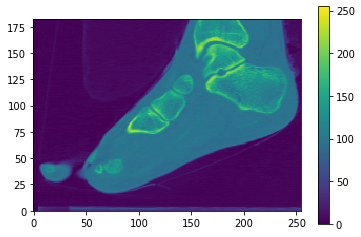

In [3]:
from parse_data import *

file_name = r"data/Foot.vol"
_, data = parse_vol_file(file_name)
show_data_slice(data[:,:,60].T)

<center>
    <img src="Images\couleuros.png" width="800"/>
</center>

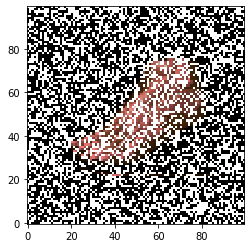

In [4]:
from colour_fun import colour_Foot
import camera

camera.colour_function = lambda x : colour_Foot(x, bone_colour=(1.0, 0.5, 0.5))
image = camera.tk_compute_image(no_shadows=False)
camera.show_image(image)

 ### The buckyball

Bucky Ball dataset        | Result
:-------------------------:|:-------------------------:
<img width="500" src="Images\Buckyball.png"/>  |  <img width="500" src="Images\c60_hd2.png"/>

## Shininess impact

Shininess = 15      | Shininess = 30
:-------------------------:|:-------------------------:
<img width="500" src="Images\sh15.png"/>  |  <img width="500" src="Images\sh30.png"/>

# Conclusion

 - Play more with lighting effects and parameters.
 - Possible optimization : Normal of interpolations $\rightarrow$ Interpolation of normals ?
 - Make it in a more efficient programming language.